In [ ]:
import cv2
import pathlib
import numpy as np
import pandas as pd
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

In [ ]:
import requests

# Replace with your GitHub details
username = "AnanthMAthreya"
repo = "SANSKRITI"
folder_path = "Indian monuments identification model/images"

# GitHub API URL
url = f"https://api.github.com/repos/{username}/{repo}/contents/{folder_path.replace(' ', '%20')}"

# Make API request
response = requests.get(url)

if response.status_code == 200:
    files = response.json()
    
    # Count directories and image files
    directories = [file["name"] for file in files if file["type"] == "dir"]
    images = [file["name"] for file in files if file["type"] == "file" and file["name"].lower().endswith(('.jpg', '.png', '.jfif'))]

    print(f"There are {len(directories)} directories and {len(images)} images in '{folder_path}'.")
else:
    print("Error:", response.status_code, response.text)



There are 2 directories and 0 images in '/content/drive/My Drive/5th sem EL/images'.
There are 24 directories and 0 images in '/content/drive/My Drive/5th sem EL/images/test'.
There are 0 directories and 30 images in '/content/drive/My Drive/5th sem EL/images/test/basilica_of_bom_jesus'.
There are 0 directories and 30 images in '/content/drive/My Drive/5th sem EL/images/test/Gateway of India'.
There are 0 directories and 34 images in '/content/drive/My Drive/5th sem EL/images/test/Charar-E- Sharif'.
There are 0 directories and 34 images in '/content/drive/My Drive/5th sem EL/images/test/Ellora Caves'.
There are 0 directories and 30 images in '/content/drive/My Drive/5th sem EL/images/test/Chhota_Imambara'.
There are 0 directories and 42 images in '/content/drive/My Drive/5th sem EL/images/test/Fatehpur Sikri'.
There are 0 directories and 40 images in '/content/drive/My Drive/5th sem EL/images/test/charminar'.
There are 0 directories and 36 images in '/content/drive/My Drive/5th sem EL/

In [ ]:
path = f"https://github.com/{username}/{repo}/tree/main/{folder_path}"

# Construct train and test directories
train_dir = f"{path}/train/"
test_dir = f"{path}/test/"
train_dir

'/content/drive/My Drive/5th sem EL/images/train/'

In [ ]:
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names

array(['Ajanta Caves', 'Charar-E- Sharif', 'Chhota_Imambara',
       'Ellora Caves', 'Fatehpur Sikri', 'Gateway of India',
       'Humayun_s Tomb', 'India gate pics', 'Khajuraho',
       'Sun Temple Konark', 'alai_darwaza', 'alai_minar',
       'basilica_of_bom_jesus', 'charminar', 'golden temple',
       'hawa mahal pics', 'iron_pillar', 'jamali_kamali_tomb',
       'lotus_temple', 'mysore_palace', 'qutub_minar', 'tajmahal',
       'tanjavur temple', 'victoria memorial'], dtype='<U21')

In [ ]:
def view_random_image(target_dir, target_class):
    target_folder = target_dir  + target_class

  # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off");

    print(f"Image shape: {img.shape}") # show the shape of the image

    return img

def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend()

Image shape: (407, 612, 3)


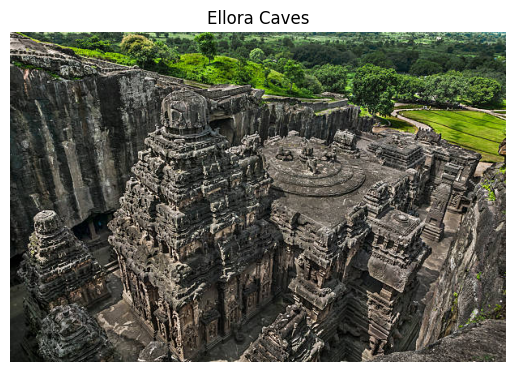

In [ ]:
import random
img = view_random_image(target_dir=train_dir, target_class=random.choice(class_names)) # get a random class name

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

# Rescale the data and create data generator instances
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(300, 300),
                                               batch_size=32,
                                               class_mode='categorical')

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(300, 300),
                                              batch_size=32,
                                              class_mode='categorical')


Found 3666 images belonging to 24 classes.
Found 1049 images belonging to 24 classes.


In [ ]:
model_10 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(300, 300, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(24, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model_10.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

history_10 = model_10.fit(train_data,
                          epochs=5,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
115/115 ━━━━━━━━━━━━━━━━━━━━ 196s 2s/step - accuracy: 0.1494 - loss: 3.1057 - val_accuracy: 0.2898 - val_loss: 3.0585
Epoch 2/5
115/115 ━━━━━━━━━━━━━━━━━━━━ 52s 454ms/step - accuracy: 0.6447 - loss: 1.3038 - val_accuracy: 0.3737 - val_loss: 3.2722
Epoch 3/5
115/115 ━━━━━━━━━━━━━━━━━━━━ 87s 494ms/step - accuracy: 0.8645 - loss: 0.5523 - val_accuracy: 0.4204 - val_loss: 4.1855
Epoch 4/5
115/115 ━━━━━━━━━━━━━━━━━━━━ 53s 465ms/step - accuracy: 0.9683 - loss: 0.1784 - val_accuracy: 0.4004 - val_loss: 4.4792
Epoch 5/5
115/115 ━━━━━━━━━━━━━━━━━━━━ 56s 485ms/step - accuracy: 0.9922 - loss: 0.0622 - val_accuracy: 0.3975 - val_loss: 5.3470


In [ ]:
def load_and_prep_image(filename, img_shape=300):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.

  return img

def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step


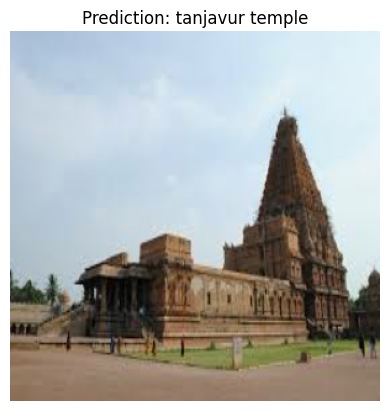

In [ ]:
pred_and_plot(model_10, "https://raw.githubusercontent.com/AnanthMAthreya/SANSKRITI/main/Indian%20monuments%20identification%20model/images/test/tanjavur%20temple/20.jpeg", class_names)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


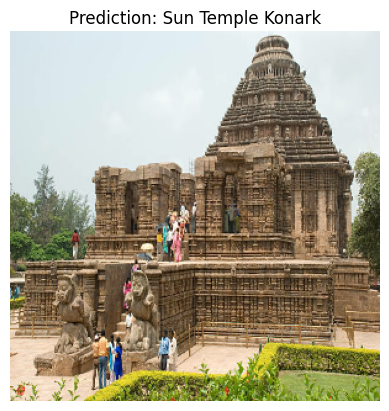

In [ ]:
pred_and_plot(model_10, "https://raw.githubusercontent.com/AnanthMAthreya/SANSKRITI/main/Indian%20monuments%20identification%20model/images/test/Sun%20Temple%20Konark/14.jpg", class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


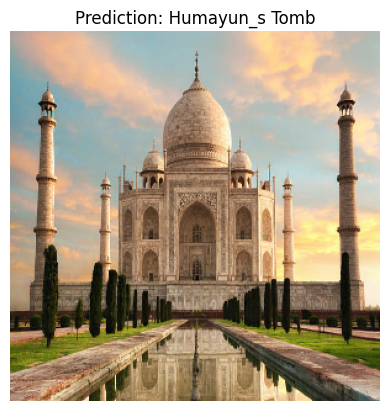

In [ ]:
pred_and_plot(model_10, "https://raw.githubusercontent.com/AnanthMAthreya/SANSKRITI/main/Indian%20monuments%20identification%20model/images/test/tajmahal/92.jpg", class_names)

In [ ]:
model_10.save("C:\Users\anant\OneDrive\Documents\GitHub\SANSKRITI\Indian monuments identification model\saved_trained_model1.keras")#Store in some local path
